In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 모든 경고 메시지 무시
warnings.filterwarnings("ignore")

In [10]:
ys_bert_rmr_basic = pd.read_csv("../data/processed/ys_bert_rmr_basic.csv", encoding="UTF-8")
ys_bert_rmr_swap = pd.read_csv("../data/processed/ys_bert_rmr_swap.csv", encoding="UTF-8")
ys_adverb_basic = pd.read_csv("../data/processed/ys_adverb_basic.csv", encoding="UTF-8")
ys_adverb_swap = pd.read_csv("../data/processed/ys_adverb_swap.csv", encoding="UTF-8")

In [30]:
def print_label_count(df):
    """라벨 분포 확인용"""
    print(len(df))
    df["label_int"] = pd.cut(
        df["label"],
        bins=[x for x in range(6)],
        labels=[x for x in range(5)],
        right=False,
    )
    print(df.groupby("label_int")["id"].count())

def plot_label_count(df,df_name):
    grouped_data = df.groupby("label")["id"].count()
    grouped_data.plot(kind="bar", color="skyblue")
    plt.title(f"{df_name} label Count")
    plt.xlabel("label")
    plt.ylabel("Count")
    plt.show()

In [31]:
print_label_count(ys_bert_rmr_basic)
print_label_count(ys_bert_rmr_swap)

17606
label_int
0    7050
1    2605
2    2172
3    3251
4    2387
Name: id, dtype: int64
28077
label_int
0    7051
1    5210
2    4346
3    6501
4    4753
Name: id, dtype: int64


In [32]:
print_label_count(ys_adverb_basic)
print_label_count(ys_adverb_swap)

13427
label_int
0    5369
1    1972
2    1676
3    2553
4    1765
Name: id, dtype: int64
21485
label_int
0    5369
1    3944
2    3352
3    5106
4    3530
Name: id, dtype: int64


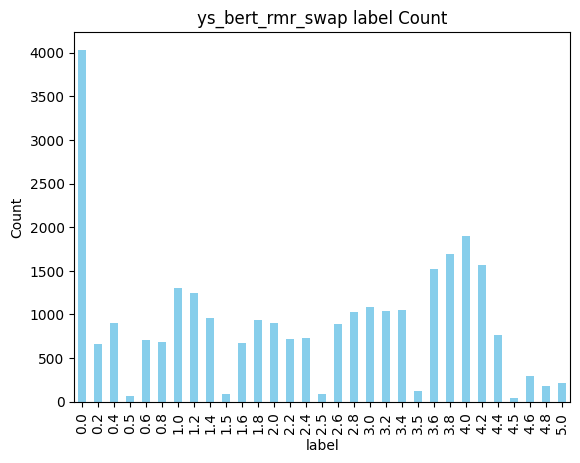

In [35]:
plot_label_count(ys_bert_rmr_swap, "ys_bert_rmr_swap")

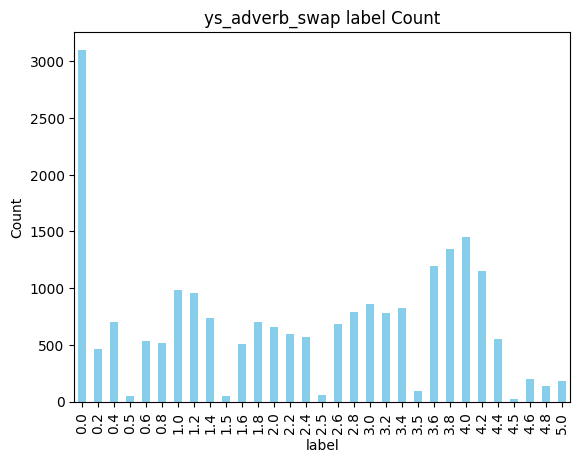

In [36]:
plot_label_count(ys_adverb_swap, "ys_adverb_swap")

In [40]:
def special_value_interpolation(df):
    # 0.5, 1.5, 2.5, 3.5, 4.5에 해당하는 값을 필터링
    target_values = [0.5, 1.5, 2.5, 3.5, 4.5]
    filtered_df = df[df["label"].isin(target_values)]


    # 각 값에 대해 절반은 +0.1, 절반은 -0.1
    def adjust_labels(group):
        n = len(group)
        # 절반으로 나눔
        half_n = n // 2
        # 첫 절반은 -0.1, 나머지는 +0.1
        group.iloc[:half_n] -= 0.1
        group.iloc[half_n:] += 0.1
        return group


    # 필터링된 값들에 대한 보정
    df.loc[df["label"].isin(target_values), "label"] = filtered_df.groupby("label")[
        "label"
    ].transform(adjust_labels)
    return df

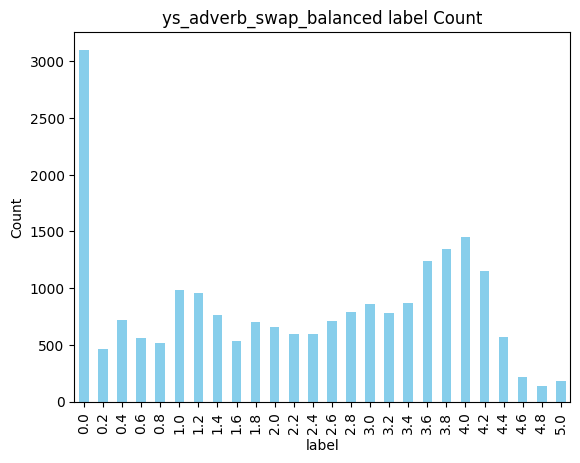

In [41]:
ys_adverb_swap_balanced = special_value_interpolation(ys_adverb_swap)
plot_label_count(ys_adverb_swap_balanced, "ys_adverb_swap_balanced")